In [1]:
%matplotlib inline

import pyxem as px
from diffsims import generators
import tensorflow as tf
import diffpy.structure
from matplotlib import pyplot as plt
import numpy as np
import os
import hyperspy as hs
from tqdm import tqdm

### Load phase maps and ground truth

In [2]:
ground_truth = hs.io.load(r'.\Data\Outputs\ground_truth.hspy')
phase_map_nmf = hs.io.load(r'.\Data\Outputs\datasetA_phasemap_NMF.hspy')
phase_map_vector = hs.io.load(r'.\Data\Outputs\datasetA_phasemap_vectors.hspy')
phase_map_template = hs.io.load(r'.\Data\Outputs\datasetA_phasemap_TMP.hspy')
phase_map_ANN = hs.io.load(r'.\Data\Outputs\datasetA_phasemap_ANN.hspy')

### Estimate the error

In [3]:
error_nmf = np.count_nonzero(np.abs((phase_map_nmf-ground_truth).data))/(512*512)
print(f'NMF mislabels {error_nmf:.2%} of the pixels.')

error_vector = np.count_nonzero(np.abs((phase_map_vector-ground_truth).data))/(512*512)
print(f'Vector matching mislabels {error_vector:.2%} of the pixels.')

error_template = np.count_nonzero(np.abs((phase_map_template-ground_truth).data))/(512*512)
print(f'Template matching mislabels {error_template:.2%} of the pixels.')

error_ANN = np.count_nonzero(np.abs((phase_map_ANN-ground_truth).data))/(512*512)
print(f'ANN mislabels {error_ANN:.2%} of the pixels.')

NMF mislabels 1.50% of the pixels.
Vector matching mislabels 1.54% of the pixels.
Template matching mislabels 1.75% of the pixels.
ANN mislabels 0.96% of the pixels.


### Plot the difference- and phase maps

In [4]:
from matplotlib.colors import to_rgba
from matplotlib.colors import LinearSegmentedColormap

color_names = ['linen', 'darkorange', 'dodgerblue', 'forestgreen', 'red']
colors = [to_rgba(c) for c in color_names]

cmap = LinearSegmentedColormap.from_list('gt_cmap', colors, N=len(color_names))

In [5]:
diff_nmf = ground_truth.data == phase_map_nmf.data
diff_vector = ground_truth.data == phase_map_vector.data
diff_template = ground_truth.data == phase_map_template.data
diff_ANN = ground_truth.data == phase_map_ANN.data

#### NMF

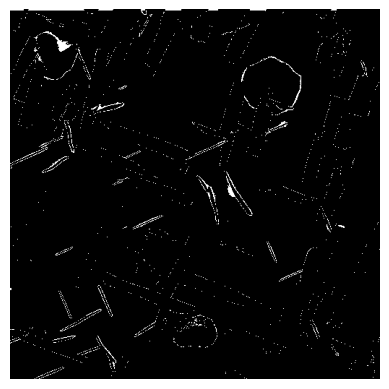

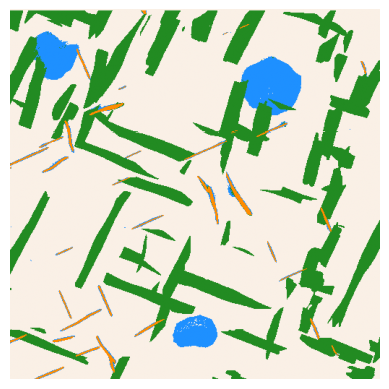

In [6]:
img = diff_nmf
file_name = '/datasetA_diff_NMF.png'
directory = r'.\Data\Outputs'

fig,ax = plt.subplots()
ax.axis('off')
ax.imshow(img, cmap='Greys')
plt.savefig(directory + file_name, transparent = True, bbox_inches = 'tight', pad_inches = 0, dpi=300)

img = phase_map_nmf.data
file_name = '/datasetA_phasemap_NMF.png'

img_flatten = img.flatten()
image = np.zeros((512*512,4))
for i in range(len(color_names)):
    mask = img_flatten == i
    image[mask] = colors[i]
image = image.reshape((512,512,4))
fig,ax = plt.subplots()
ax.axis('off')
ax.imshow(image, cmap=cmap)
plt.savefig(directory + file_name, transparent = True, bbox_inches = 'tight', pad_inches = 0, dpi=300)

#### Vector matching

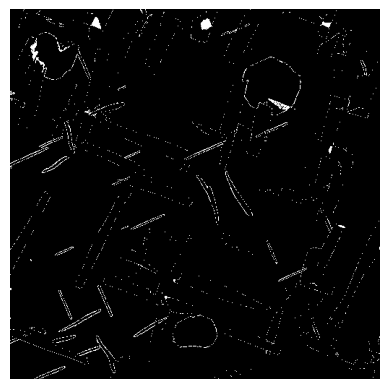

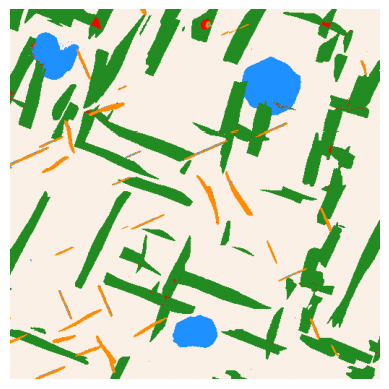

In [7]:
img = diff_vector
file_name = '/datasetA_diff_vectors.png'
directory = r'.\Data\Outputs'

fig,ax = plt.subplots()
ax.axis('off')
ax.imshow(img, cmap='Greys')
plt.savefig(directory + file_name, transparent = True, bbox_inches = 'tight', pad_inches = 0, dpi=300)

img = phase_map_vector.data
file_name = '/datasetA_phasemap_vectors.png'

img_flatten = img.flatten()
image = np.zeros((512*512,4))
for i in range(len(color_names)):
    mask = img_flatten == i
    image[mask] = colors[i]
image = image.reshape((512,512,4))
fig,ax = plt.subplots()
ax.axis('off')
ax.imshow(image, cmap=cmap)
plt.savefig(directory + file_name, transparent = True, bbox_inches = 'tight', pad_inches = 0, dpi=300)

#### Template matching

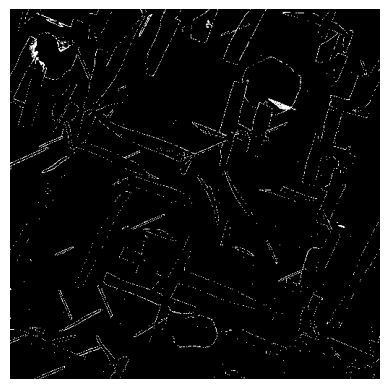

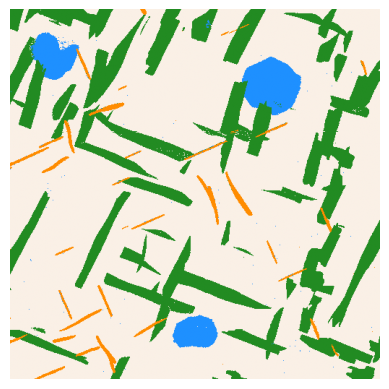

In [8]:
img = diff_template
file_name = '/datasetA_diff_TMP.png'
directory = r'.\Data\Outputs'

fig,ax = plt.subplots()
ax.axis('off')
ax.imshow(img, cmap='Greys')
plt.savefig(directory + file_name, transparent = True, bbox_inches = 'tight', pad_inches = 0, dpi=300)

img = phase_map_template.data
file_name = '/datasetA_phasemap_TMP.png'

img_flatten = img.flatten()
image = np.zeros((512*512,4))
for i in range(len(color_names)):
    mask = img_flatten == i
    image[mask] = colors[i]
image = image.reshape((512,512,4))
fig,ax = plt.subplots()
ax.axis('off')
ax.imshow(image, cmap=cmap)
plt.savefig(directory + file_name, transparent = True, bbox_inches = 'tight', pad_inches = 0, dpi=300)

#### ANN

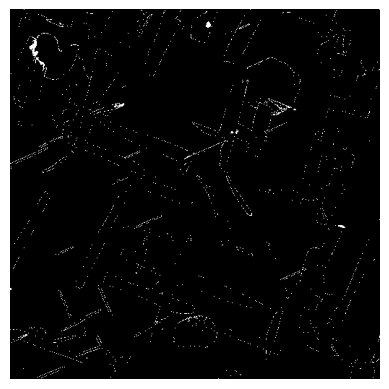

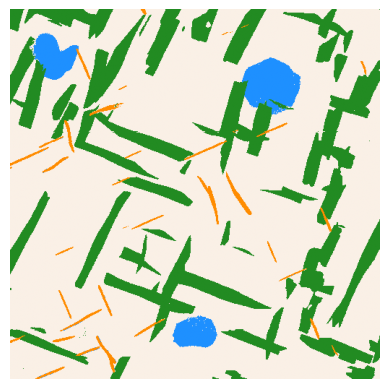

In [9]:
img = diff_ANN
file_name = '/datasetA_diff_ANN.png'
directory = r'.\Data\Outputs'

fig,ax = plt.subplots()
ax.axis('off')
ax.imshow(img, cmap='Greys')
plt.savefig(directory + file_name, transparent = True, bbox_inches = 'tight', pad_inches = 0, dpi=300)

img = phase_map_ANN.data
file_name = '/datasetA_phasemap_ANN.png'

img_flatten = img.flatten()
image = np.zeros((512*512,4))
for i in range(len(color_names)):
    mask = img_flatten == i
    image[mask] = colors[i]
image = image.reshape((512,512,4))
fig,ax = plt.subplots()
ax.axis('off')
ax.imshow(image, cmap=cmap)
plt.savefig(directory + file_name, transparent = True, bbox_inches = 'tight', pad_inches = 0, dpi=300)